* * *
* * *
## Code for generating figures in Anttila et al. (2024)
* * *
* * *

In [11]:
########### Bring in tools to use in rest of notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
import plotly.express as px
import json
import requests
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KernelDensity
############|

### Lu/Hf/eHf parameters
 * * * 

In [12]:
# Vervoort et al. 2018 values
# Lu_DM = 0.03976 
# Hf_DM = 0.283238

Hf_DM = 0.283225
Lu_DM = 0.0383

# Vervoort & Blichert-Toft 1999
Hf_CHUR = 0.282772
Lu_CHUR = 0.0332

lam_Lu = 1.867e-5 # My-1

In [13]:
Paired_Hf_Upb=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='ALL_VOLC')

Hf176Hf177=Paired_Hf_Upb['Hf176_177_Corr_mean']
Lu176Hf177=Paired_Hf_Upb['Lu176_Hf177_Corr_mean']
t=Paired_Hf_Upb['Age']
t_sigma=Paired_Hf_Upb['Age_2Sigma']
name=Paired_Hf_Upb['Name']





In [14]:

ehf=10000*((Hf176Hf177 - Lu176Hf177*(np.exp(lam_Lu*t)-1)) / \
                  (Hf_CHUR - Lu_CHUR*(np.exp(lam_Lu*t)-1)) - 1)

print(len(ehf))

447


In [15]:
column_values = ['eHf']
df = pd.DataFrame(data = ehf, columns=column_values ) 

df.to_csv("Output/eHf.csv") #saves all eHf

* * * 
### eHf of CRV localities; plotted vs individual zircon age, with PDP polygons. Main component of Fig. 2, Anttila et al., 2024.
* * * 

In [16]:
#import Hf data from individual samples
SON9=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SON9')
SON14=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SON14')
MT24=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='MT24')
OR24=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='OR24')
BM=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='BM')
IR22=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='IR22')
PVT1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='PVT1')
GV3=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='GV3')
SCBL4=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SCBL4')
SCBL3=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SCBL3')
DN1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='DN1')
DN2=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='DN2')
SCBL2=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SCBL2')
SCBLC=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SCBL_Clast')
SCIN1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='SCIN1')
OF1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='OF1')
LO1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='LO1')
TM1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='TM1')
GR1_TU1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='GR1_TU1')
PV4=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='PV4')
PV1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='PV1')
PV6=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='PV6')
NV1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='NV1')
LC3=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='LC3')
YM1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='YM1')
BP1=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='BP1')
HP2=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='HP2')
CF2=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='CF2')
ALL=pd.read_excel('Data/eHf_by_sample.xlsx',sheet_name='ALL_VOLC')

/var/folders/zl/ntk4d6311nx6t3kb_t2534hw0000gn/T/ipykernel_49683/980694113.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_s =plt.cm.get_cmap('viridis_r')


28
28
28
0.48139372731245045


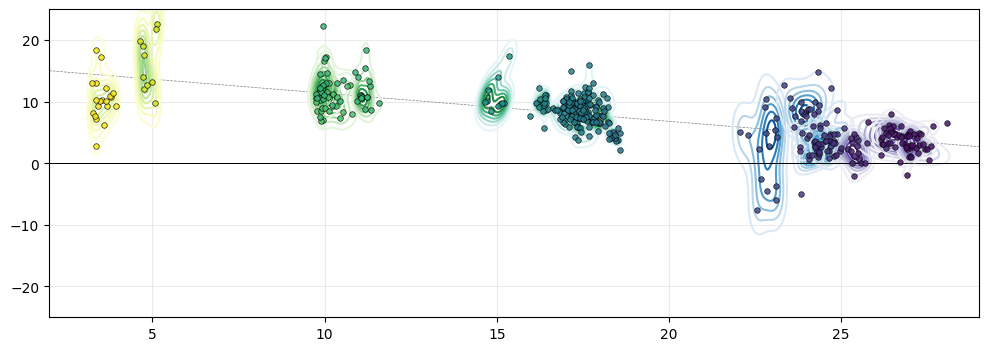

In [17]:
import numpy as np
import scipy.stats as st
sample_list=SON14,SON9,MT24,OR24,BM,IR22,PVT1,GV3,SCBL4,SCBL3,DN1,DN2,SCBL2,SCBLC,SCIN1,OF1,LO1,TM1,GR1_TU1,PV4,PV1,PV6,NV1,LC3,YM1,BP1,HP2,CF2

cmap_s =plt.cm.get_cmap('viridis_r')
color_list=cmap_s(0.35/25),cmap_s(1.71/25),cmap_s(6.93/25),cmap_s(7.03/25),cmap_s(8.11/25),cmap_s(8.209/25),cmap_s(11.72/25),cmap_s(13.23/25),cmap_s(13.79/25),cmap_s(13.953/25),cmap_s(14.197/25),cmap_s(14.23/25),cmap_s(14.32/25),cmap_s(14.43/25),cmap_s(14.45/25),cmap_s(14.295/25),cmap_s(14.86/25),cmap_s(15.47/25),cmap_s(19.52/25),cmap_s(20.5/25),cmap_s(21.14/25),cmap_s(21.16/25),cmap_s(21.27/25),cmap_s(21.49/25),cmap_s(22.375/25),cmap_s(23.38/25),cmap_s(23.43/25),cmap_s(23.98/25)#,'r'

import cmasher as cmr
Yl = cmr.get_sub_cmap('YlGn', .01, 0.3)
Yl2 = cmr.get_sub_cmap('YlGn', .01, 0.5)

gradient_list=Yl,Yl2,'Greens','Greens','Greens','Greens','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','BuGn','Blues','Blues','Blues','Blues','Blues','Blues','Purples','Purples','Purples','Purples'#'Reds'

print(len(color_list))
print(len(gradient_list))
print(len(sample_list))

fig = plt.figure(figsize=(12,4))

Fx=ALL['Age'].dropna()
Fy=ALL['eHf'].dropna()

Fz=np.polyfit(Fx,Fy,1)
Ff=np.poly1d(Fz)
Fxnew = np.linspace((Fx.min())-2,(Fx.max())+1, 500)
Fynew = Ff(Fxnew)
plt.plot(Fxnew,Fynew,'--', color='gray',linewidth=.5)
xn=Fx.values.reshape(-1,1)
yn=Fy.values.reshape(-1,1)
model=LinearRegression()
model.fit(xn, yn)
eHf_r_squared = model.score(xn,yn)
print(eHf_r_squared)

#plt.axvspan(18,24, color='whitesmoke')

for j in range(0,len(sample_list)):
    plt.errorbar(sample_list[j]['Age'],sample_list[j]['eHf'],fmt='o',markersize='4',elinewidth=.25, color=color_list[j], markeredgecolor='k', markeredgewidth=.5, alpha=.85)
    
for j in range(0,len(sample_list)):
        x = sample_list[j]['Age']
        y = sample_list[j]['eHf']
        # Define the borders
        xmin = min(x-1) 
        xmax = max(x+1) 
        ymin = min(y-5) 
        ymax = max(y+6) 
        # Create meshgrid
        xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = st.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)
        plt.contour(xx, yy, f, cmap=gradient_list[j])
      
        plt.axhline(0,linewidth=.5,color='k')
        plt.xlim(2,29)
        plt.ylim(-25,25)

#plt.errorbar(TU1['Age'],TU1['eHf'],fmt='o',markersize='4',elinewidth=.25, color=cmap_s(19.34/25), markeredgecolor='r', markeredgewidth=.5, alpha=.85)
plt.grid(alpha=.25)  
        
plt.savefig('Output/CRV_eHf_KDE.pdf')
plt.show()

* * *
 ### Distance of CRV localities to MTJ, plotted vs time. Fig. 3B of Anttila et al. (2024)
* * *

/var/folders/zl/ntk4d6311nx6t3kb_t2534hw0000gn/T/ipykernel_49683/2044550611.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Blues')
/var/folders/zl/ntk4d6311nx6t3kb_t2534hw0000gn/T/ipykernel_49683/2044550611.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(wm_age,distance,c=colorname, cmap=cmap, s=40,edgecolors='k',linewidths=.15,zorder=2)


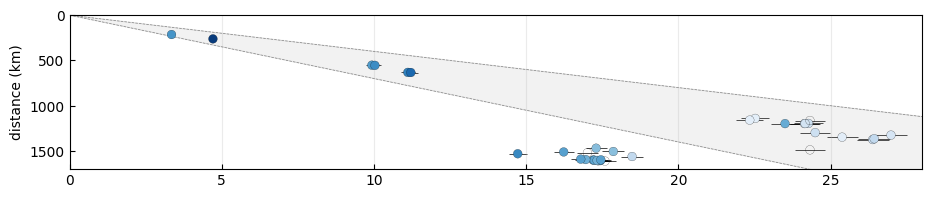

In [18]:
plt.figure(figsize=(11,2))

import math
UPb_recon=pd.read_csv('Data/Recon_Upb.csv')
lat_recon=UPb_recon['Recon_Lat']
long_recon=UPb_recon['Recon_Long']

ehfr=UPb_recon['eHf_mean']

LatMTJ=40.209
LongMTJ=-123.698

s_SNV_10_lat=34.84990
s_SNV_10_long=-117.25838
s_SNV_22_lat=34.24067
s_SNV_22_long=-115.80959

a=(LatMTJ-lat_recon)*111 #convert to km
b=(-(LongMTJ-long_recon))*111 #convert to km
a2=[x**2 for x in a]
b2=[x**2 for x in b]
from operator import add
hyp= map(add, a2,b2)

distance=[math.sqrt(x) for x in hyp]

wm_age=UPb_recon['WM_Age']
wm_2s=UPb_recon['WM_2s_abs']
hf_recon=UPb_recon['eHf_mean']

plt.errorbar(wm_age,distance,xerr=wm_2s,
             fmt='.',
             markersize=.01,
             color='k',
             elinewidth=.5,zorder=1)

x1 = np.array([0,40])
y1 = ((70)*(x1)) #(7cm/yr )
y11 = ((40)*(x1)) #(4cm/yr )
plt.plot(x1,y1,'--', color='gray',linewidth=.5)
plt.plot(x1,y11,'--', color='gray',linewidth=.5)
plt.fill_between(x1,y1,y11,color='gray',alpha=.1)

cmap=plt.cm.get_cmap('Blues')
colorname=cmap((ehfr/17))#(ehfr-ehfr.min())/(ehfr.max()-ehfr.min()))   #   cmap((wm_age-3)/25)

plt.scatter(wm_age,distance,c=colorname, cmap=cmap, s=40,edgecolors='k',linewidths=.15,zorder=2)

ax=plt.gca()

ax.tick_params(direction="in")

plt.ylim(0,1700)
plt.xlim(0,28)
plt.gca().invert_yaxis()
plt.gca().xaxis.grid(True, alpha=.25)

#plt.xlabel('age (Ma)')
plt.ylabel('distance (km)')

plt.tight_layout
plt.savefig('Output/DistvsAge.pdf')

* * *
# U-Pb vs Ar ages, CRV. Fig. S1, Anttila et al. (2024)
* * *

In [19]:
CRV_ages=pd.read_csv('Data/CRV_Upb_summary.csv')

U_Pb_age=CRV_ages['WM_Age']
U_Pb_error=CRV_ages['WM_2s_abs']

Ar_age=CRV_ages['Legacy_Age_1']
Ar_error=CRV_ages['Legacy_Age_1_2s']
Ar_type=CRV_ages['Legacy_type']

Other_age=CRV_ages['Other_Age']
Other_error=CRV_ages['Other_Age_2s']

number=CRV_ages['N_order']

eHf_avg=CRV_ages['eHf_mean']

/var/folders/zl/ntk4d6311nx6t3kb_t2534hw0000gn/T/ipykernel_49683/3617404455.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Blues')


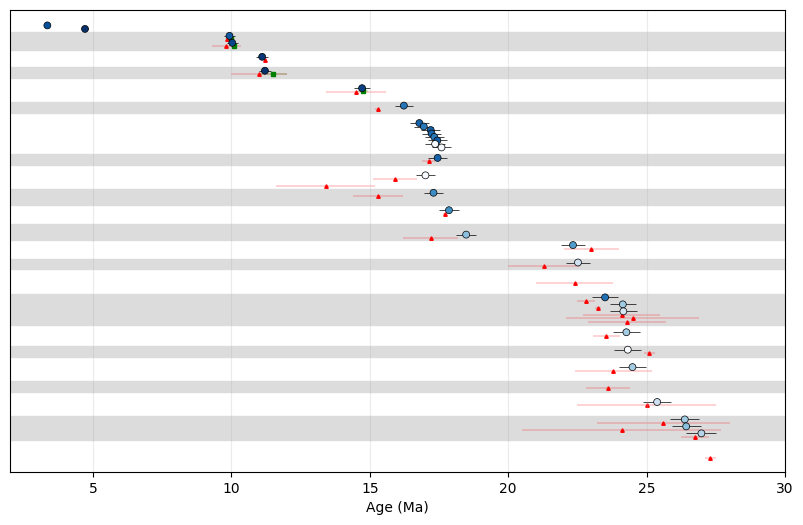

In [20]:
plt.figure(figsize=(10,6))
plt.axhspan(.8,1.8,color='gainsboro',alpha=1)
plt.axhspan(2.8,3.4,color='gainsboro',alpha=1)
plt.axhspan(4.8,5.4,color='gainsboro',alpha=1)
plt.axhspan(7.8,8.4,color='gainsboro',alpha=1)
plt.axhspan(9.8,10.7,color='gainsboro',alpha=1)
plt.axhspan(11.8,12.7,color='gainsboro',alpha=1)
plt.axhspan(13.8,14.4,color='gainsboro',alpha=1)
plt.axhspan(15.8,17.6,color='gainsboro',alpha=1)
plt.axhspan(18.8,19.4,color='gainsboro',alpha=1)
plt.axhspan(20.8,21.4,color='gainsboro',alpha=1)
plt.axhspan(22.8,24.2,color='gainsboro',alpha=1)

plt.errorbar(U_Pb_age,number,xerr=U_Pb_error,
             fmt='o',
             color='k',
             markersize='1',
             elinewidth=.5,zorder=1)

plt.errorbar(Ar_age,number+.2,xerr=Ar_error,
                fmt='^',
                 color='r',
                 markersize='2.5',
                 elinewidth=.25,alpha=1,zorder=1)

plt.errorbar(Other_age,number+.16,xerr=Other_error,
                 fmt='s',
                 color='green',
                 markersize='2.5',
                 elinewidth=.25, alpha=1,zorder=1)

#bring in heat map for sedrate color scheme
cmap=plt.cm.get_cmap('Blues')
colorname=cmap((ehfr/17))#(ehfr-ehfr.min())/(ehfr.max()-ehfr.min()))   #   cmap((wm_age-3)/25)

plt.scatter(U_Pb_age,number,c=eHf_avg, cmap=cmap, vmin=-1, vmax=12, s=25,edgecolors='k',linewidths=.5,zorder=2)

plt.ylim(-.5,26)
plt.gca().invert_yaxis()
plt.gca().xaxis.grid(True, alpha=.25)
plt.yticks([])
plt.xlabel('Age (Ma)')
plt.xlim(2,30)
plt.savefig('Output/CRV_Age_Comp.pdf')

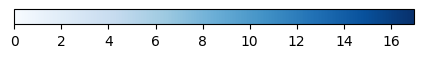

In [21]:
a = np.array([[0,17]])
plt.figure(figsize=(5, .25))
img = plt.imshow(a, cmap="Blues")
plt.gca().set_visible(False)
cax = plt.axes([0.1, 0.2, 0.8, 0.6])
plt.colorbar(orientation="horizontal", cax=cax)
layout='tight'
plt.savefig("Output/colorbar_blues.pdf")

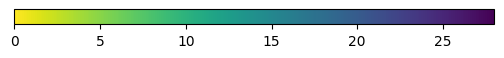

In [14]:
import pylab as pl
import numpy as np

a = np.array([[0,28]])
pl.figure(figsize=(6, .25))
img = pl.imshow(a, cmap="viridis_r")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
layout='tight'
pl.savefig("Output/colorbar.pdf")